In [170]:
#Import common modules
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

In [171]:
path = 'Data sets/apparel-companies-waste-2.csv'
data = pd.read_csv(path, index_col=None)
data.head()

,Company,Year,Value,Source Page
0,Puma,2023,5595,https://wikirate.org/~18046254
1,H&M,2023,Unknown,https://wikirate.org/~19244996
2,Marks and Spencer Group plc,2023,69000,https://wikirate.org/~18045616
3,Asos,2023,Unknown,https://wikirate.org/~18087425
4,Adidas AG,2023,26382,https://wikirate.org/~18074968


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      466 non-null    object
 1   Year         466 non-null    int64 
 2   Value        466 non-null    object
 3   Source Page  466 non-null    object
dtypes: int64(1), object(3)
memory usage: 14.7+ KB


In [206]:
apparel_waste=data.drop(['Source Page'], axis=1)
apparel_waste

,Company,Year,Value
0,Puma,2023,5595
1,H&M,2023,Unknown
2,Marks and Spencer Group plc,2023,69000
3,Asos,2023,Unknown
4,Adidas AG,2023,26382
...,...,...,...
461,Puma,2006,94.122
462,Puma,2005,105.344
463,Puma,2004,Unknown
464,Puma,2003,Unknown


In [210]:
apparel_waste = apparel_waste.replace('Unknown', np.nan)
apparel_waste['Value'] = pd.to_numeric(apparel_waste['Value'], errors='coerce')
apparel_waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  466 non-null    object 
 1   Year     466 non-null    int64  
 2   Value    236 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.1+ KB


In [218]:
apparel_waste.sort_values(by='Value', ascending=False, inplace=True)

In [175]:
apparel_waste.isnull().sum()

Company          0
Year             0
Value          230
Source Page      0
dtype: int64

In [176]:
#Let's find outliers???
apparel_waste.describe()

,Year,Value
count,466.000000,2.360000e+02
mean,2019.482833,1.236552e+05
std,2.881294,1.204046e+06
min,2002.000000,0.000000e+00
25%,2018.000000,2.279425e+03
50%,2019.000000,1.338750e+04
75%,2022.000000,5.095635e+04
max,2023.000000,1.847804e+07


In [177]:
apparel_waste[apparel_waste['Value'] == 0]

,Company,Year,Value,Source Page
108,Onward Holdings,2022,0.0,https://wikirate.org/~14549405


In [222]:
#we have to do this manually, because the values are too spread (I think)
apparel_waste.drop(index=199, inplace=True)
apparel_waste.drop(index=108, inplace=True)

In [224]:
apparel_waste.describe()

,Year,Value
count,464.000000,234.000000
mean,2019.476293,45746.100957
std,2.885032,100784.141019
min,2002.000000,2.984000
25%,2018.000000,2289.118200
50%,2019.000000,13387.500000
75%,2022.000000,50819.126815
max,2023.000000,691879.000000


In [228]:
apparel_waste.head(15)

,Company,Year,Value
151,Kering,2021,691879.0
128,Zalando SE,2021,680000.0
175,Carrefour S.A.,2021,672000.0
110,Carrefour S.A.,2022,587000.0
178,Primark,2021,571000.0
180,Aldi Nord,2021,381242.0
72,Fast Retailing,2022,241873.0
5,Nike Inc.,2023,236984.0
143,TJX Companies,2021,216684.0
237,Nike Inc.,2019,145434.0


In [230]:
max_value = apparel_waste['Value'].max()
apparel_waste[apparel_waste['Value'] == max_value]

,Company,Year,Value
151,Kering,2021,691879.0


In [234]:
Kering=apparel_waste[apparel_waste.Company=='Kering'].copy()
Kering

,Company,Year,Value
151,Kering,2021,691879.0
274,Kering,2019,19834.0
409,Kering,2017,19195.0
23,Kering,2023,18945.0
368,Kering,2018,18527.0
429,Kering,2016,14680.0
443,Kering,2015,13871.0
211,Kering,2020,13366.0
453,Kering,2014,12205.0


#okay, this looks wrong. Why only in one year it's tripled? 
Let's research Kering. They own Gucci, Saint Laurent, Bottega Veneta, Balenciaga, Alexander McQueen ect. In 2022 20.4 billion in revenue.
https://www.kering.com/api/download-file/?path=Kering_Environmental_Profit_and_Loss_Report_2021_EN_Only_e2a0a90be1.pdf
the value IS correct. but I assume they just counted it differently that year or...??
according to their ecological report, they produced 297,279 tones of waste in 2023...

https://kering-group.opendatasoft.com/pages/report/

In [214]:
apparel_waste_2023=apparel_waste[apparel_waste.Year==2023].copy()
apparel_waste_2023.sort_values(by=['Value'], ascending=False, inplace=True)

In [249]:
#How many companies did not give the data in 2023? 15
apparel_waste_2023.isna().sum()
Missing2023 = apparel_waste_2023['Value'].isna().sum()
Missing2023

15

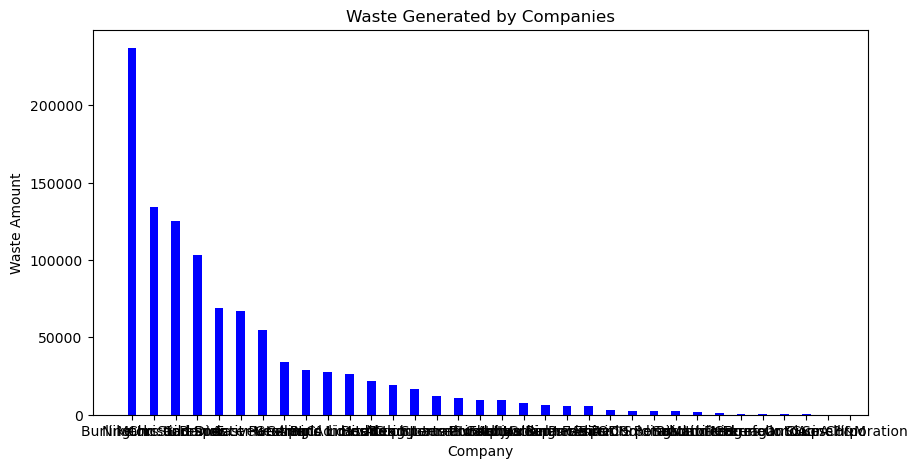

In [202]:
#now we want this as a graph + compare to average amount of waste 
company = list(apparel_waste_2023['Company'])
waste = list(apparel_waste_2023['Value'])
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(company, waste, color ='blue', 
        width = 0.4)

plt.xlabel("Company")
plt.ylabel("Waste Amount")
plt.title("Waste Generated by Companies")

plt.show()


In [143]:
apparel_waste_2022=apparel_waste[apparel_waste.Year==2022].copy()
apparel_waste_2022=apparel_waste_2022.sort_values(by=['Value'], ascending=False)
apparel_waste_2022.head(40)

,Company,Year,Value
110,Carrefour S.A.,2022,587000.0
72,Fast Retailing,2022,241873.0
113,Kohl's,2022,137008.0
94,Christian Dior,2022,118332.0
54,Louis Vuitton Malletier SA (LVMH),2022,118330.0
...,...,...,...
109,Target,2022,NaN
115,Gucci,2022,NaN
117,Chanel SA,2022,NaN
118,Tesco PLC,2022,NaN


In [247]:
#How many companies did not give the data in 2022? 30
Missing2022 = apparel_waste_2022['Value'].isna().sum()
Missing2022

30

In [243]:
apparel_waste_2021=apparel_waste[apparel_waste.Year==2021].copy()
apparel_waste_2021=apparel_waste_2021.sort_values(by=['Value'], ascending=False)
Missing2021 = apparel_waste_2021['Value'].isna().sum()
Missing2021

35

In [253]:
apparel_waste_2020 = apparel_waste[apparel_waste.Year==2020].copy()
Missing2020 = apparel_waste_2020['Value'].isna().sum()
Missing2020

22